In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat

## Load and display data

In [2]:
loaded_data = np.genfromtxt("../../data/2g_Pid-3223_Sid-36787.dat", skip_header = 1, delimiter = ',')
Pid = 3223
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

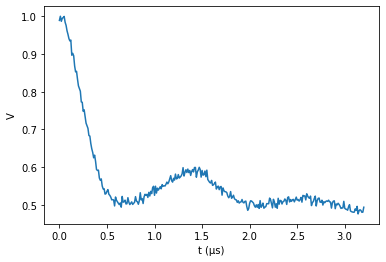

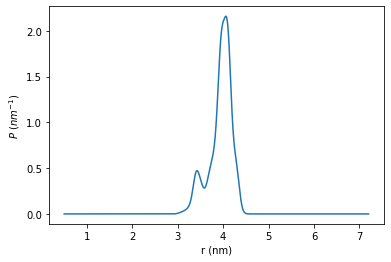

In [3]:
plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')
plt.show()

P0s = loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['P0']
rref = np.squeeze(loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['r0'])
Pref = P0s[Pid-1,:]

plt.plot(rref, Pref)
plt.xlabel('r (nm)')
plt.ylabel(r'$P~(nm^{-1})$')
plt.show()



## Regularization

In [4]:
pars = {"method": 'regularization', "r": np.linspace(2,6,200)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 3000,"tune": 1000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

Sequential sampling (4 chains in 1 job)
CompoundStep
>SamplePfromV: [P]
>randTau: [tau]
>randDelta: [delta]
>NUTS: [k, V0, lamb]


C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Sampling 1 chain for 1_000 tune and 3_000 draw iterations (1_000 + 3_000 draws total) took 350 seconds.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [ ]:
dive.summary(trace, model, Pid = Pid)  

## Twos Gaussians

In [ ]:
pars_gauss = {"method": 'gaussian', "r": np.linspace(2,6,200), 'nGauss': 2}

model_gauss = dive.model(t, Vexp, pars_gauss)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace_gauss = dive.sample(model_gauss,MCMCparameters)

In [ ]:
dive.summary(trace_gauss, model_gauss, Pid = Pid)  